# Домашнее задание 6

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_6

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию координатного спуска (смотри семинар). 

Для такого метода подберите шаг $\gamma$ для наилучшей сходимости постройте график сходимости (по оси $y$ - критерий $\| \nabla f(x^k)\|^2$, а по оси $x$ - число арифмитических операций при подсчете "градиента"). Постройте на этом же графике сходимость честного градиентного спуска c наилучшим шагом сходимости. Сделайте вывод о характере сходимости нового метода.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math 
import time
%matplotlib inline
import scipy.stats
from scipy.stats import ortho_group

In [2]:
def generate_matrix(d, m, L):
  assert(mu >= 0)
  assert(d >= 2)
  diag = (L-mu)*np.random.random_sample(d) + mu
  diag[0] = L
  diag[1] = mu
  B = np.diag(diag)
  S = ortho_group.rvs(d) # фиксим диагональность
  B = S.T@B@S
  return B

In [3]:
L = 1000
mu = 1
d = 100
sigma = 10
m = 0
N = 1000

A = generate_matrix(d, mu, L)
b = np.random.normal(m, sigma, d)

In [4]:
def grad_f(x):
    return A @ x - b

def grad_f_i(A, b, x, i):
  res = np.zeros(d)
  res[i] = A[i].T@x - b[i]
  return res

In [5]:
grad_count_coord = []
criterion_coord = []

grad_count_gd = []
criterion_gd = []

def gradient_descent(x_0, learning_rate, iter_number):
    x = x_0
    grad_count_1 = 0.0
    for k in range(iter_number):
        gr = grad_f(x)
        x = x - learning_rate * gr
        
        grad_count_1 = grad_count_1 + d**2+d
        grad_count_gd.append(grad_count_1)
        criterion_gd.append(np.linalg.norm(gr))
    return x

def coordinate_descent(x_0, learning_rate, iter_number):
    grad_count_1 = 0.0
  
    x = x_0
    for k in range(iter_number):
        i = np.random.randint(0, d)
        grad_i = grad_f_i(A, b, x, i)
        grad_count_1 += 2*d
        criterion_coord.append(np.linalg.norm(grad_f(x)))
        grad_count_coord.append(grad_count_1)
        x = x - learning_rate * grad_i
    

x = gradient_descent([0] * d, 1 / L, N)
x = coordinate_descent([0] * d, 1/ L, N*50)


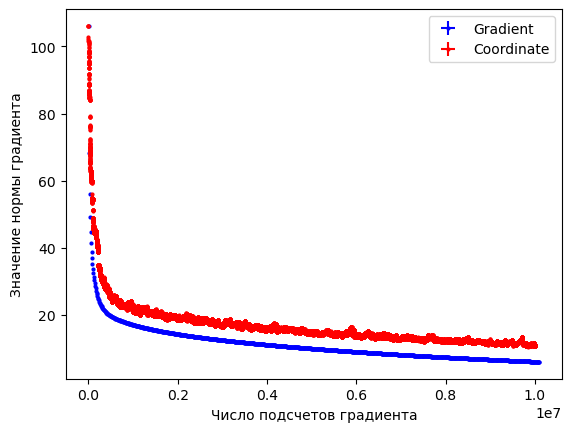

In [6]:
plt.ylabel("Значение нормы градиента")
plt.xlabel("Число подсчетов градиента")
plt.errorbar(grad_count_gd, criterion_gd, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'Gradient')
plt.errorbar(grad_count_coord, criterion_coord, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'Coordinate')
plt.legend()

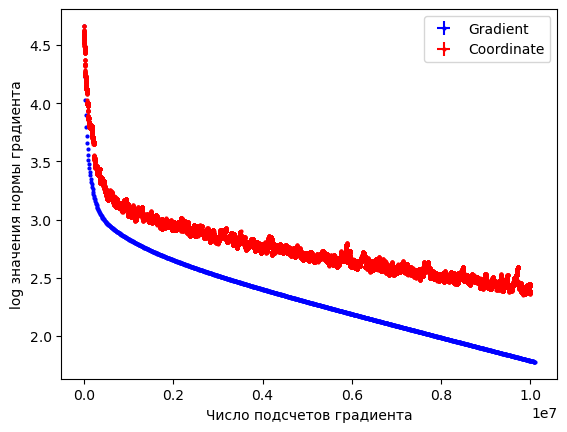

In [7]:
plt.ylabel("log значения нормы градиента")
plt.xlabel("Число подсчетов градиента")
plt.errorbar(grad_count_gd, np.log(criterion_gd), yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'Gradient')
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'Coordinate')
plt.legend()

Градиентный спуск оказался быстрее координатного

__(б)__ В координатном спуске можно брать несколько координат вместо одной. Модифицируйте координнатный спуск, исходя из этого, пробуя разное число координат $b = 1, 5, 10, 20$, а также разные способы сэмплирования: все координатны независимо или зависимо, чтобы не было повторений в батче. Постройте графики аналогичные пункту (а). Сделайте вывод.

In [8]:
grad_count_coord = []
criterion_coord = []
    
def Batch_grad_а(x, batch):
    res = np.zeros(d)
    res[batch] = A[batch]@x - b[batch]
    return res

def multiple_сoordinate_descent(x_0, learning_rate, iter_number, batch_size, dependent):
    count = 0
    x = x_0
    for k in range(iter_number):
        batch = np.random.choice(100, batch_size, replace = dependent)
        grad_i = Batch_grad_а(x, batch)
        count += d * len(batch) + d
        x = x - learning_rate * grad_i
        
        criterion_coord.append(np.linalg.norm(grad_f(x)))
        grad_count_coord.append(count)
        


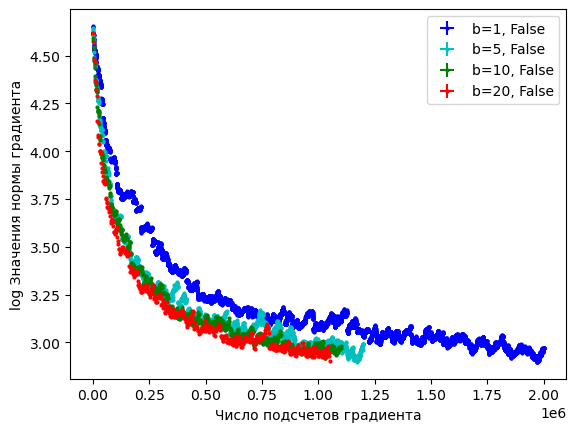

In [9]:
N=10000
plt.ylabel("log Значения нормы градиента")
plt.xlabel("Число подсчетов градиента")

x=multiple_сoordinate_descent([0] * d, 1/ L, N, 1, False)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'b=1, False')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//5, 5, False)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'b=5, False')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//10, 10, False)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'b=10, False')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//20, 20, False)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'b=20, False')

plt.legend()

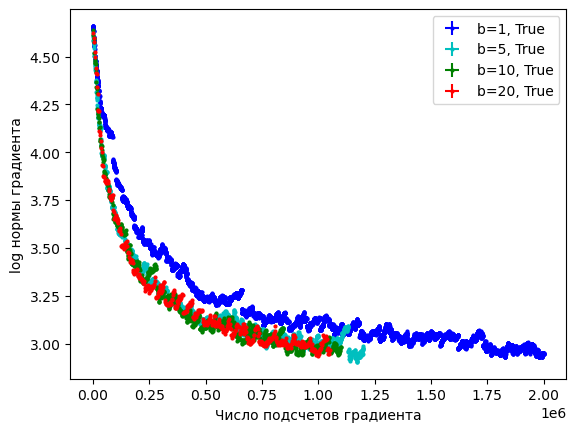

In [10]:
N=10000
plt.ylabel("log нормы градиента")
plt.xlabel("Число подсчетов градиента")

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N, 1, True)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'b=1, True')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//5, 5, True)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'b=5, True')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//10, 10, True)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'b=10, True')

grad_count_coord = []
criterion_coord = []
x=multiple_сoordinate_descent([0] * d, 1/ L, N//20, 20, True)
plt.errorbar(grad_count_coord, np.log(criterion_coord), yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'b=20, True')

plt.legend()

В зависимом случае быстрее всего $b=10$, в независимом $b=20$

## Задача 2

Рассмотрим задачу линейной регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. 

In [11]:
from sklearn.datasets import load_svmlight_file

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y = 2 * y - 3
N, d = X.shape

print(N,d)

8124 112


In [12]:
sum = np.zeros((d, d))
for i in range(N):
    x_i = X[i]
    sum += np.outer(x_i, x_i.T)
sum = sum/(2 * N)

L = np.real(max(np.linalg.eigvals(sum)))
mu = np.real(min(np.linalg.eigvals(sum)))
print(f"L = {L} \n")
print(f"mu = {mu} \n")

L = 5.172428467808865 

mu = -1.045859041980506e-16 



$\mu \approx 0$, поэтому задачу считаем выпуклой, но не сильно выпуклой

__(б)__ Реализуйте координатный SGD, SEGA для задачи линейно регрессии. Каким будете брать $b$? Как будете выбирать шаг и другие параметры методов?

$b=5$. Шаг берем $0.9/L$

In [13]:
iter_number=500

criterion_SGD = []
grad_count_SGD = []
time_SGD = []
accuracy_SGD = []

def grad_f(X, y, w, N):
    sum = np.array([0.0]*X.shape[1])
    for i in range(N):
        e = np.exp(-w.T@X[i]*y[i])
        sum = sum + e/(1 + e) * X[i] * y[i]
    return -sum/N + L/500 * w

def Batch_grad_f(X, y, w, N, batch):
    sum = np.zeros(X.shape[1])
    for i in range(N):
        e = np.exp(-w.T@X[i]*y[i])
        sum[batch] += e/(1.0 + e) * X[i][batch] * y[i]
    w_new = np.zeros(d)
    w_new[batch] = w[batch]
    return -sum/N + L/500 * w_new


def Coordinate_SGD(X, y, N, x_0, learning_rate, iter_number, batch_size, dependent):
    start = time.time()
    count = 0
    
    x = x_0
    for k in range(iter_number):
        batch = np.random.choice(d, batch_size, replace = dependent)
        grad_i = Batch_grad_f(X, y, x, N, batch)
        x = x - learning_rate * grad_i
        
        count += 2*(N+1)*len(batch)
        time_SGD.append(time.time() - start)
        accuracy_SGD.append((list(np.sign(X@x) - y).count(0)/len(y)))
        criterion_SGD.append(np.linalg.norm(grad_f(X, y, x, N)))
        grad_count_SGD.append(count)


w=Coordinate_SGD(X, y, N, np.zeros(d), 1/L, iter_number, 5, False)

In [14]:
criterion_SEGA = []
grad_count_SEGA = []
time_SEGA = []
accuracy_SEGA = []

def Coordinate_SEGA(X, y, N, x_0, learning_rate, iter_number, batch_size, dependent):
    start = time.time()
    count = 0
    x = x_0
    h = np.zeros(d)
    grad = grad_f(X, y, x, N)
    for k in range(iter_number):
        batch = np.random.choice(d, batch_size, replace = dependent)
        grad_i = Batch_grad_f(X, y, x, N, batch)
        count += 2 * N * len(batch)
        
        h_prev = np.array(h)
        h[batch] = grad_i[batch]
        count += len(batch)
        
        g = h_prev
        g[batch] += batch_size * (grad_i[batch] - h_prev[batch])
        count += 2 * len(batch)
        
        x = (x - learning_rate * g) / (1 + L/1000)
        count += d*3
        time_SEGA.append(time.time() - start)
        accuracy_SEGA.append((list(np.sign(X@x) - y).count(0)/len(y)))
        criterion_SEGA.append(np.linalg.norm(grad_f(X, y, x, N)))
        grad_count_SEGA.append(count)


Coordinate_SEGA(X, y, N, np.zeros(d), 1/L, iter_number, 5, False)

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество арифметических операций, по оси $y$ - $\|\nabla f(x^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

В ходе экспериментов выянил, что при увеличении шага увеличивается скорость, но ухудшается итоговая точность. Я остановился на $1/L$ для обоих графиков

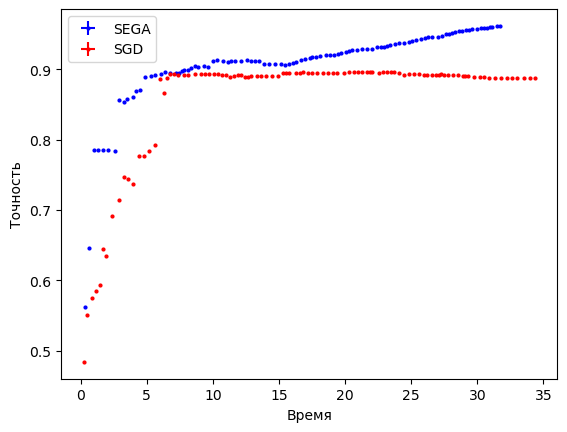

In [15]:
plt.ylabel("Точность")
plt.xlabel("Время")

#print(len(time_SGD), len(grad_count_SGD))
plt.errorbar(time_SEGA[:100], accuracy_SEGA[:100], yerr = 0, xerr = 0, fmt = 'o',color = 'b', ms = 2, label = 'SEGA')
plt.errorbar(time_SGD[:100], accuracy_SGD[:100], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SGD')

plt.legend()

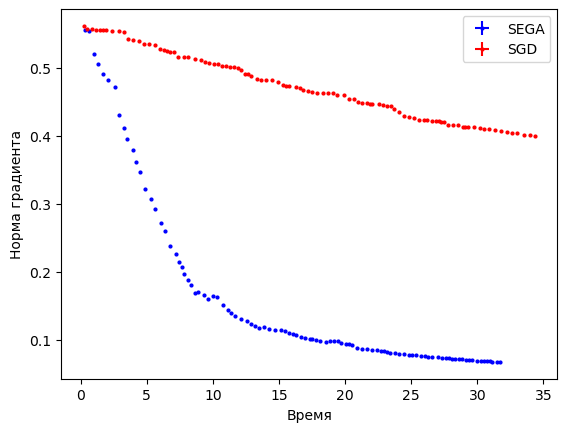

In [16]:
plt.ylabel("Норма градиента")
plt.xlabel("Время")

#print(len(time_SGD), len(grad_count_SGD))
plt.errorbar(time_SEGA[:100], criterion_SEGA[:100], yerr = 0, xerr = 0, fmt = 'o',color = 'b', ms = 2, label = 'SEGA')
plt.errorbar(time_SGD[:100], criterion_SGD[:100], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SGD')

plt.legend()

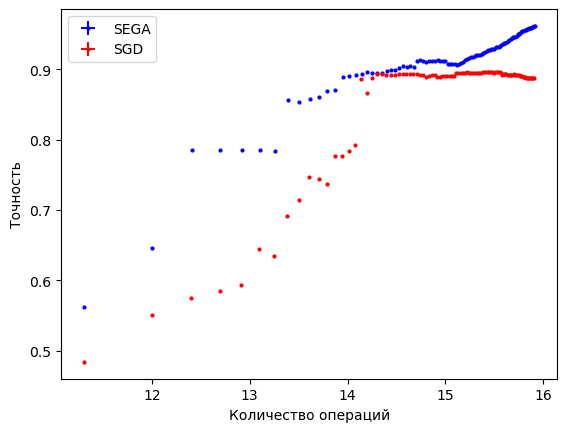

In [17]:
plt.ylabel("Точность")
plt.xlabel("Количество операций")

#print(len(time_SGD), len(grad_count_SGD))
plt.errorbar(np.log(grad_count_SEGA[:100]), accuracy_SEGA[:100], yerr = 0, xerr = 0, fmt = 'o',color = 'b', ms = 2, label = 'SEGA')
plt.errorbar(np.log(grad_count_SGD[:100]), accuracy_SGD[:100], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SGD')

plt.legend()

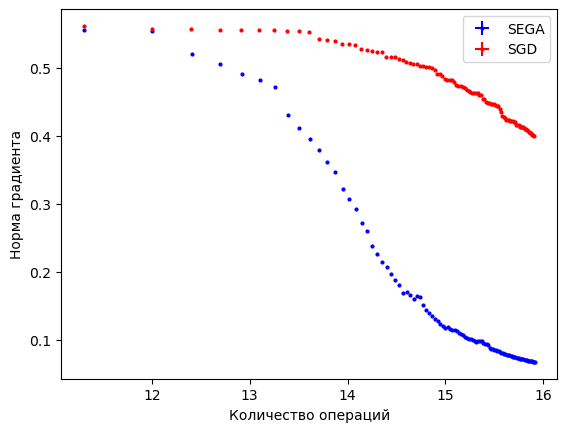

In [18]:
plt.ylabel("Норма градиента")
plt.xlabel("Количество операций")

#print(len(time_SGD), len(grad_count_SGD))
plt.errorbar(np.log(grad_count_SEGA[:100]), criterion_SEGA[:100], yerr = 0, xerr = 0, fmt = 'o',color = 'b', ms = 2, label = 'SEGA')
plt.errorbar(np.log(grad_count_SGD[:100]), criterion_SGD[:100], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SGD')

plt.legend()

Во всех случаях SEGA оказался быстрее. SGD был быстрее только первые несколько шагов алгоритма

__Бонусные пункты__

__(г)__ Попробуйте объеденить подходы SAGA/SVRG/L-SVRG и координатный SGD/SEGA (т.е. могут получиться пары SAGA + координатный, SVRG + SEGA и еще четыре других). Вам достаточно выбрать одну пару. Как при этом будет выглядеть итерация метода (запишите в явном виде)? Докажите сходимость данного подхода для $\mu$-сильно выпуклой $f$ и $L$-гладкой $f_i$.

In [19]:
#ответ

__(д)__ Реализуйте новый метод. Сравните его с двумя методами, которые были взяты за базу, на задаче линейной регресии. Способы сравнения методов придумайте самостоятельно. Сделайте вывод.

In [20]:
#ответ